<a href="https://colab.research.google.com/github/jdasam/mas1004-2022/blob/main/notebooks/DataAI_1st_week_1_livecoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kernel restart will erase every namespace

NameError: ignored

In [ ]:
a = 10

In [ ]:
%who
# % sybmol is a magic keyword for jupyter.
# it runs special commands for jupyter,
# and these commands are not python command


NameError: ignored

In [ ]:
whos

Variable   Type    Data/Info
----------------------------
a          int     10


In [ ]:
print(a)

10


In [ ]:
print(a + 7)
b = a + 4
print(b)

17
14


In [ ]:
whos

Variable   Type    Data/Info
----------------------------
a          int     10
b          int     14


In [ ]:
# Install Image scraper library for python
# To install library for python, you have to command to your OS, not to python
# In Jupyter Notebook, if you add ! in front of the code, 
# that means that code will be ran by your OS terminal, not by Python 

# The code below make your Linux OS to install python library called jmd_imagescraper
# pip is a library controller. It helps you to install or uninstall python library 
!pip install jmd_imagescraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 38.5 MB/s 


In [ ]:
from jmd_imagescraper.core import duckduckgo_search

In [ ]:
??duckduckgo_search

In [17]:
# This will print out the current working directory's absolute path
%pwd

'/content'

In [18]:
# The following command will print out the list of files and directories in current working directory
%ls

apple/  sample_data/


In [ ]:
# Absolute path vs Relative path

In [22]:
from pathlib import Path
image_dir = Path('/content/image_dir')
image_dir.mkdir(exist_ok=True) 
# make the directory as given path, even though the directory already exists in the same path

candidates = ['ragdoll cat', 'siamese cat', 'persian cat', 'sphynx cat']
for cat in candidates:
  duckduckgo_search(path=image_dir, keywords=cat, label=cat.split(' ')[0])

Duckduckgo search: ragdoll cat


Duckduckgo search: siamese cat


Duckduckgo search: persian cat


Duckduckgo search: sphynx cat


In [23]:
# from fastai.vision.all import *
# from fastai.vision.widgets import *

from fastai.vision.all import DataBlock, ImageBlock, CategoryBlock, get_image_files, RandomSplitter, parent_label, Resize, ClassificationInterpretation, PILImage
from fastai.vision.widgets import widgets

In [37]:
from fastai.vision.all import cnn_learner, resnet18, error_rate

In [24]:
%whos

Variable                       Type             Data/Info
---------------------------------------------------------
CategoryBlock                  function         <function CategoryBlock at 0x7fd79f62fc20>
ClassificationInterpretation   type             <class 'fastai.interpret.<...>ificationInterpretation'>
DataBlock                      type             <class 'fastai.data.block.DataBlock'>
ImageBlock                     function         <function ImageBlock at 0x7fd7974e6f80>
PILImage                       BypassNewMeta    <class 'fastai.vision.core.PILImage'>
Path                           type             <class 'pathlib.Path'>
RandomSplitter                 function         <function RandomSplitter at 0x7fd797700c20>
Resize                         _TfmMeta         <class 'fastai.vision.augment.Resize'>
a                              int              10
b                              int              14
candidates                     list             n=4
cat                      

In [26]:
images = DataBlock(
    blocks= (ImageBlock, CategoryBlock), # use image and category
    get_items= get_image_files, # get image files from given directory
    splitter=RandomSplitter(valid_pct=0.2), # split train and validation in random
    get_y = parent_label, # get the label from the parent directory's name
    item_tfms=Resize(128) # resize every image in to the same size
) 

In [28]:
dls = images.dataloaders(image_dir)

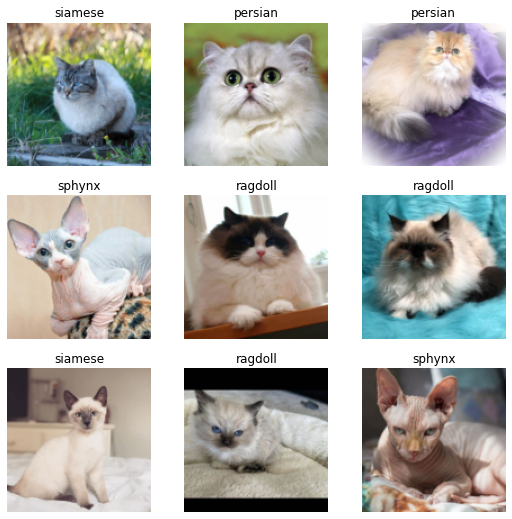

In [29]:
dls.train.show_batch()

In [38]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
# we will use dls as a dataloader
# use resenet18 as our model (system). These are predefined
# metrics: how we will evaluate how good our model is 

learn.fine_tune(5)
# We will train the model (resnet18) for 5 epochs



/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.947842,0.986371,0.375000,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.916234,0.547415,0.212500,00:02
1,0.715051,0.474737,0.250000,00:02
2,0.517830,0.517490,0.225000,00:02
3,0.405591,0.540232,0.212500,00:02
4,0.333830,0.530387,0.187500,00:02


In [ ]:
# if you randomly guess the answer among 4 possible options, what would be the error rate?


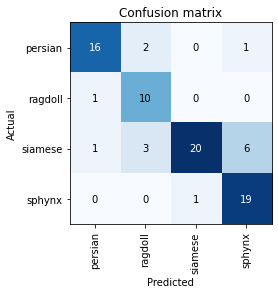

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

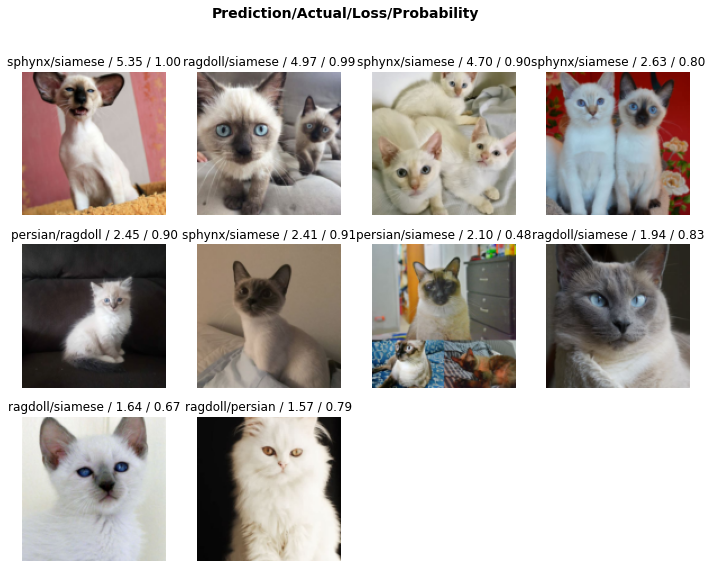

In [40]:
interp.plot_top_losses(10)

In [41]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

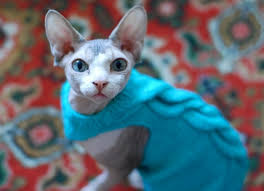

In [44]:
img = PILImage.create(btn_upload.data[-1])
img

In [45]:
learn.predict(img)

('sphynx',
 TensorBase(3),
 TensorBase([7.9190e-04, 2.2735e-05, 3.3783e-02, 9.6540e-01]))